## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.6 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.15.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
!pip install datasets

from datasets import load_dataset

dataset=load_dataset("dair-ai/emotion")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 22.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [ ]:
def get_tweets(data):
    tweets = [x['text'] for x in data]
    labels = [x['label'] for x in data]
    return tweets, labels

In [ ]:
tweets, labels = get_tweets(train)

In [ ]:
tweets[0], labels[0]

('i didnt feel humiliated', 0)

##  Tokenizer

 Tokenizing the tweets

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(tweets)

print(tokenizer.texts_to_sequences([tweets[0]]))

[[2, 139, 3, 679]]


In [ ]:
tokenized_sequences = tokenizer.texts_to_sequences(tweets)

for i, seq in enumerate(tokenized_sequences[:10]):
    print(f"Tweet {i+1}: {seq}")

Tweet 1: [2, 139, 3, 679]
Tweet 2: [2, 40, 101, 60, 8, 15, 494, 5, 15, 3496, 553, 32, 60, 61, 128, 148, 76, 1480, 4, 22, 1255]
Tweet 3: [17, 3060, 7, 1149, 5, 286, 2, 3, 495, 438]
Tweet 4: [2, 24, 165, 8, 665, 27, 6, 4158, 2, 59, 47, 9, 13, 22, 72, 30, 6, 3497]
Tweet 5: [2, 24, 8, 1065]
Tweet 6: [73, 48, 8, 7, 56, 521, 319, 328, 158, 161, 9, 20]
Tweet 7: [73, 48, 329, 35, 7401, 35, 196, 7402, 888, 4, 73, 2475, 1384, 7, 159, 1885, 19, 2, 117, 3, 14, 15, 455]
Tweet 8: [2, 3, 29, 439, 27, 78, 29, 7, 1686, 35, 29, 760, 29, 7, 193, 267, 374]
Tweet 9: [2, 21, 48, 25, 5260, 16, 215, 2, 3, 9, 5260, 99, 5261, 135, 4, 132, 7, 1038, 4159]
Tweet 10: [2, 3, 666, 94]


## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

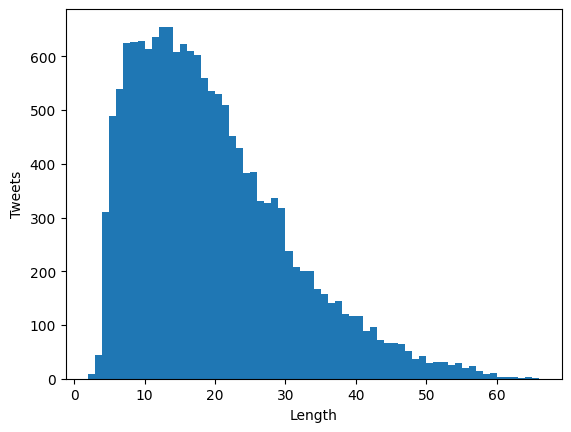

In [ ]:


lengths = [len(t.split(' ')) for t in tweets]

plt.hist(lengths, bins=len(set(lengths)))
plt.xlabel('Length')
plt.ylabel('Tweets')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [ ]:
padded_train_sequences = get_sequences(tokenizer, tweets)

In [ ]:
padded_train_sequences[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes = set(labels)
print(classes)

{0, 1, 2, 3, 4, 5}


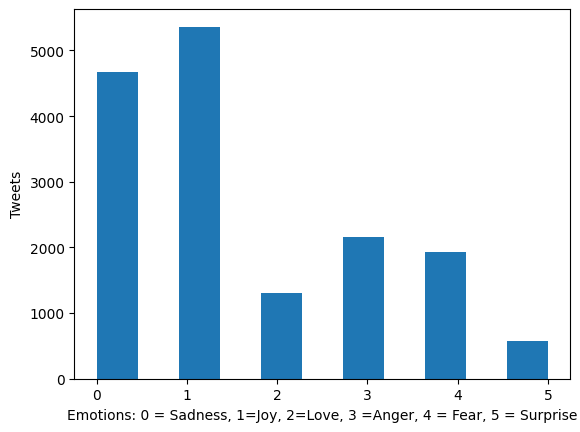

In [ ]:
plt.hist(labels, bins=11)
plt.xlabel('Emotions: 0 = Sadness, 1=Joy, 2=Love, 3 =Anger, 4 = Fear, 5 = Surprise')
plt.ylabel('Tweets')
plt.show()

In [ ]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [ ]:
classes_to_index

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [ ]:
index_to_classes

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [ ]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [ ]:
train_labels = names_to_ids(labels)
print(train_labels[0])

0


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirection  (None, 50, 40)            5920      
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175926 (687.21 KB)
Trainable params: 175926 (687.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_tweets, val_labels = get_tweets(val)
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [ ]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [ ]:
h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/20
500/500 [==============================] - 40s 65ms/step - loss: 1.3626 - accuracy: 0.4207 - val_loss: 1.0505 - val_accuracy: 0.5875
Epoch 2/20
500/500 [==============================] - 29s 58ms/step - loss: 0.7071 - accuracy: 0.7324 - val_loss: 0.6405 - val_accuracy: 0.7750
Epoch 3/20
500/500 [==============================] - 33s 66ms/step - loss: 0.4672 - accuracy: 0.8453 - val_loss: 0.6149 - val_accuracy: 0.7925
Epoch 4/20
500/500 [==============================] - 31s 62ms/step - loss: 0.3078 - accuracy: 0.8981 - val_loss: 0.4725 - val_accuracy: 0.8415
Epoch 5/20
500/500 [==============================] - 29s 58ms/step - loss: 0.2179 - accuracy: 0.9299 - val_loss: 0.4351 - val_accuracy: 0.8670
Epoch 6/20
500/500 [==============================] - 29s 58ms/step - loss: 0.1554 - accuracy: 0.9504 - val_loss: 0.4080 - val_accuracy: 0.8800
Epoch 7/20
500/500 [==============================] - 31s 61ms/step - loss: 0.1133 - accuracy: 0.9633 - val_loss: 0.3808 - val_accuracy:

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

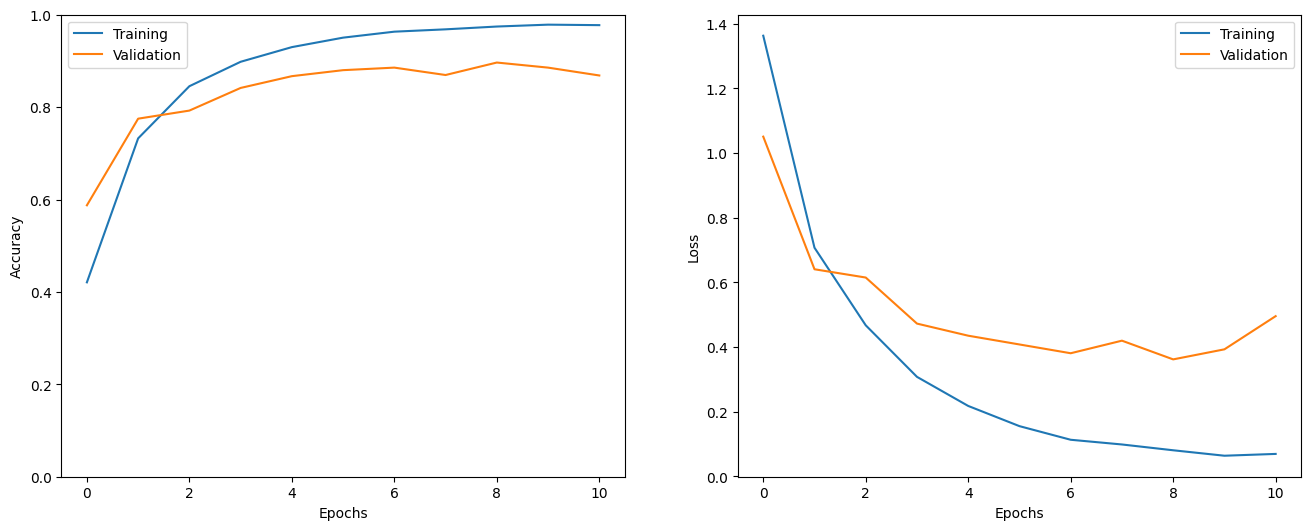

In [ ]:
show_history(h)

In [ ]:
!pip install shap





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.5 MB/s eta 0:00:00


In [ ]:
import shap
# Assuming 'model' is your trained model
explainer = shap.Explainer(model, val_sequences)
shap_values = explainer(val_sequences)

# Plot SHAP values
shap.summary_plot(shap_values, val_sequences)

PermutationExplainer explainer:  56%|█████▋    | 1127/2000 [2:29:45<1:59:24,  8.21s/it]

In [ ]:
test_tweets, test_labels = get_tweets(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [ ]:


# Evaluate the model on the test set
_, accuracy = model.evaluate(test_sequences, test_labels)

# Calculate accuracy percentage
accuracy_percentage = accuracy * 100

# Print the accuracy percentage
print(f"Accuracy: {accuracy_percentage:.2f}%")

63/63 [==============================] - 1s 17ms/step - loss: 0.4410 - accuracy: 0.8735
Accuracy: 87.35%


In [ ]:
i = random.randint(0, len(test_labels) - 1)

print('Sentence:', test_tweets[i])
print('Emotion:', index_to_classes[test_labels[i]])

probabilities = model.predict(np.expand_dims(test_sequences[i], axis=0))[0]
p = np.argmax(probabilities)

print('Predicted Emotion:', index_to_classes.get(p))


Sentence: i can feel some kind of acceptance in the song which is why i gave the photo a kind of ecstatic ascension to a higher level of conscience aesthetic like a rapture of sort
Emotion: 1
1/1 [==============================] - 1s 1s/step
Predicted Emotion: 1


In [ ]:
import numpy as np

pred_probs = model.predict(test_sequences)
preds = np.argmax(pred_probs, axis=1)
test_labels_reshaped = np.reshape(test_labels, (-1, 1))
print("Shape of preds:", preds.shape)
print("Shape of test_labels:", test_labels_reshaped.shape)


63/63 [==============================] - 0s 6ms/step
Shape of preds: (2000,)
Shape of test_labels: (2000, 1)


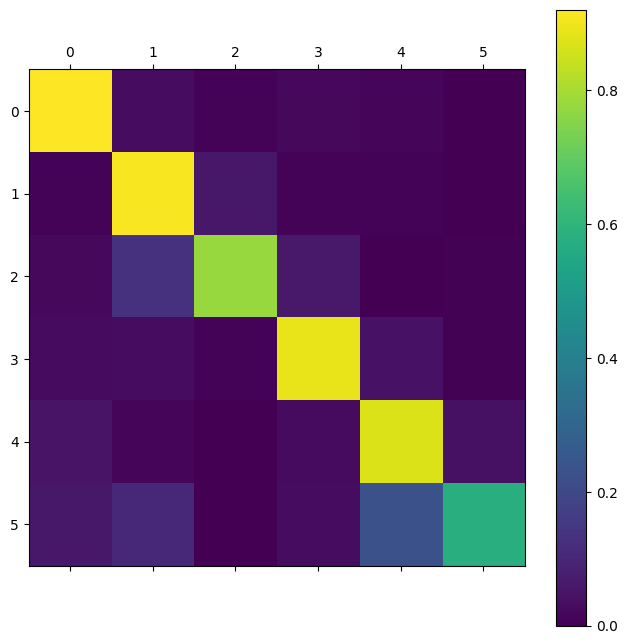

In [ ]:
show_confusion_matrix(test_labels, preds, list(classes))

63/63 [==============================] - 1s 8ms/step


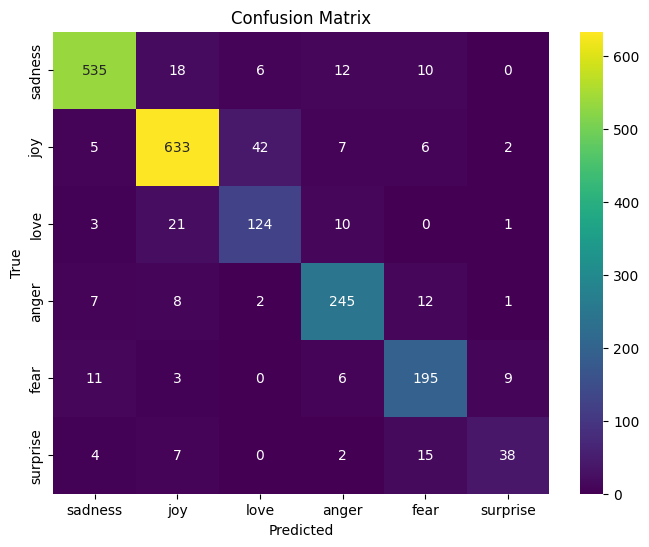

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

label_mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

pred_probs = model.predict(test_sequences)
preds = np.argmax(pred_probs, axis=1)
test_labels_reshaped = np.reshape(test_labels, (-1, 1))

confusion_mat = confusion_matrix(test_labels_reshaped, preds)
labels = [label_mapping[i] for i in range(len(label_mapping))]

plt.figure(figsize=(8, 6))
# Change the 'cmap' parameter value to adjust the color of the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#in total precision

from sklearn.metrics import precision_score


# Calculate precision
precision = precision_score(test_labels, preds, average='weighted')

# Display precision
print("Precision:", precision)


Precision: 0.8863360329482274


In [ ]:
#seperate precision for each labels

from sklearn.metrics import precision_score


# Calculate precision
precision = precision_score(test_labels, preds, average=None)

# Display precision for each class
for label, score in zip(label_mapping.values(), precision):
    print(f"Precision for {label}: {score}")


Precision for sadness: 0.9469026548672567
Precision for joy: 0.9173913043478261
Precision for love: 0.7126436781609196
Precision for anger: 0.8687943262411347
Precision for fear: 0.819327731092437
Precision for surprise: 0.7450980392156863


In [ ]:
#total_recall
from sklearn.metrics import recall_score


# Calculate recall
recall = recall_score(test_labels, preds, average='weighted')


print("Recall:", recall)


Recall: 0.885


In [ ]:
#seperate for each labels of data

from sklearn.metrics import recall_score



# Calculate recall
recall = recall_score(test_labels, preds, average=None)

# Display recall for each class
for label, score in zip(label_mapping.values(), recall):
    print(f"Recall for {label}: {score}")


Recall for sadness: 0.9208261617900172
Recall for joy: 0.9107913669064748
Recall for love: 0.779874213836478
Recall for anger: 0.8909090909090909
Recall for fear: 0.8705357142857143
Recall for surprise: 0.5757575757575758


In [ ]:
from sklearn.metrics import f1_score


# Calculate F1-score
f1 = f1_score(test_labels, preds, average='weighted')

# Display F1-score
print("F1-score:", f1)


F1-score: 0.8850263906534276


In [ ]:
from sklearn.metrics import f1_score



# Calculate F1-score
f1 = f1_score(test_labels, preds, average=None)

# Display F1-score for each class
for label, score in zip(label_mapping.values(), f1):
    print(f"F1-score for {label}: {score}")


F1-score for sadness: 0.9336823734729494
F1-score for joy: 0.9140794223826714
F1-score for love: 0.7447447447447448
F1-score for anger: 0.8797127468581688
F1-score for fear: 0.8441558441558442
F1-score for surprise: 0.6495726495726497


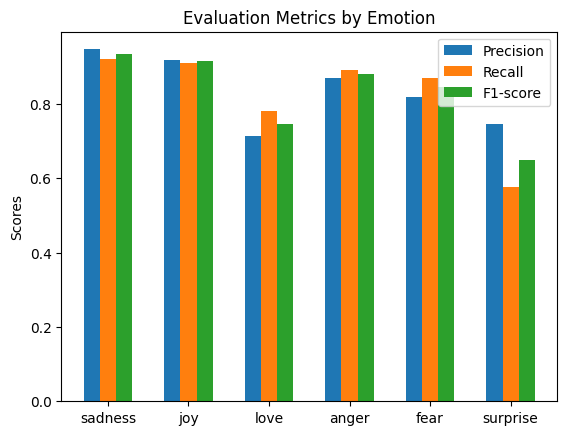

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score



# Calculate precision, recall, and F1-score
precision = precision_score(test_labels, preds, average=None)
recall = recall_score(test_labels, preds, average=None)
f1 = f1_score(test_labels, preds, average=None)

# Get emotion labels and their corresponding scores
emotion_labels = [label_mapping[i] for i in range(len(label_mapping))]
scores = [precision, recall, f1]

# Plotting the metrics
fig, ax = plt.subplots()
x = np.arange(len(emotion_labels))
width = 0.2

# Plot precision
ax.bar(x - width, scores[0], width, label='Precision')

# Plot recall
ax.bar(x, scores[1], width, label='Recall')

# Plot F1-score
ax.bar(x + width, scores[2], width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics by Emotion')
ax.set_xticks(x)
ax.set_xticklabels(emotion_labels)
ax.legend()

plt.show()


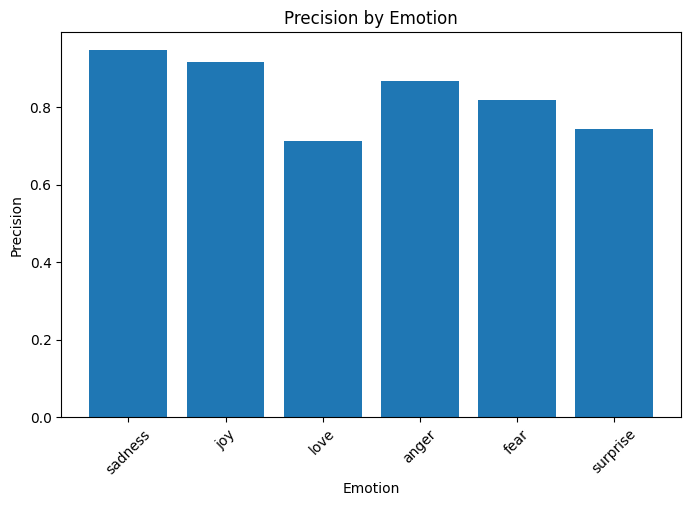

In [ ]:
from sklearn.metrics import precision_score


# Calculate precision
precision = precision_score(test_labels, preds, average=None)

# Get emotion labels and corresponding precision scores
emotion_labels = [label_mapping[i] for i in range(len(label_mapping))]

# Plotting precision
plt.figure(figsize=(8, 5))
plt.bar(emotion_labels, precision)
plt.title('Precision by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()

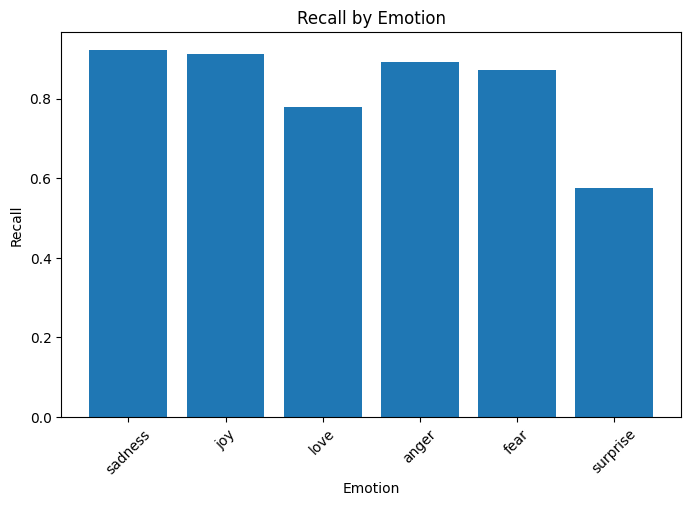

In [ ]:
#plot recall
from sklearn.metrics import recall_score


# Calculate recall
recall = recall_score(test_labels, preds, average=None)

# Get emotion labels and corresponding recall scores
emotion_labels = [label_mapping[i] for i in range(len(label_mapping))]

# Plotting recall
plt.figure(figsize=(8, 5))
plt.bar(emotion_labels, recall)
plt.title('Recall by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()








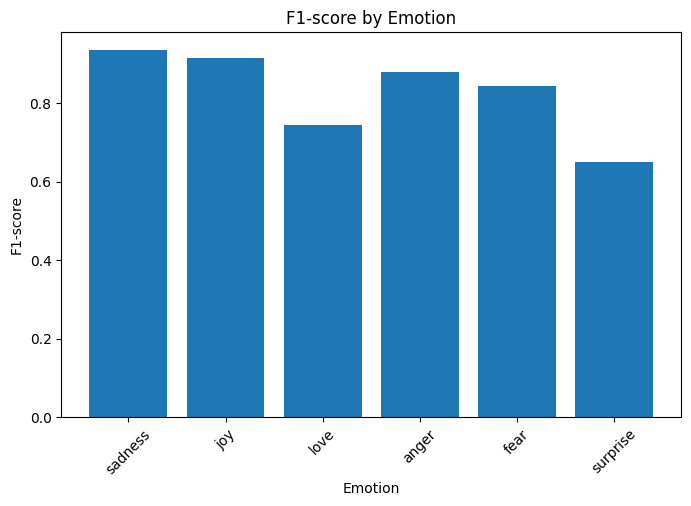

In [ ]:
#plot F-score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Calculate F1-score
f1 = f1_score(test_labels, preds, average=None)

# Get emotion labels and corresponding F1-scores
emotion_labels = [label_mapping[i] for i in range(len(label_mapping))]

# Plotting F1-score
plt.figure(figsize=(8, 5))
plt.bar(emotion_labels, f1)
plt.title('F1-score by Emotion')
plt.xlabel('Emotion')
plt.ylabel('F1-score')
plt.xticks(rotation=45)
plt.show()


# Classification_report of the Model

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(test_labels, preds, target_names=label_mapping.values())

# Display the classification report
print(report)


              precision    recall  f1-score   support

     sadness       0.95      0.92      0.93       581
         joy       0.92      0.91      0.91       695
        love       0.71      0.78      0.74       159
       anger       0.87      0.89      0.88       275
        fear       0.82      0.87      0.84       224
    surprise       0.75      0.58      0.65        66

    accuracy                           0.89      2000
   macro avg       0.84      0.82      0.83      2000
weighted avg       0.89      0.89      0.89      2000



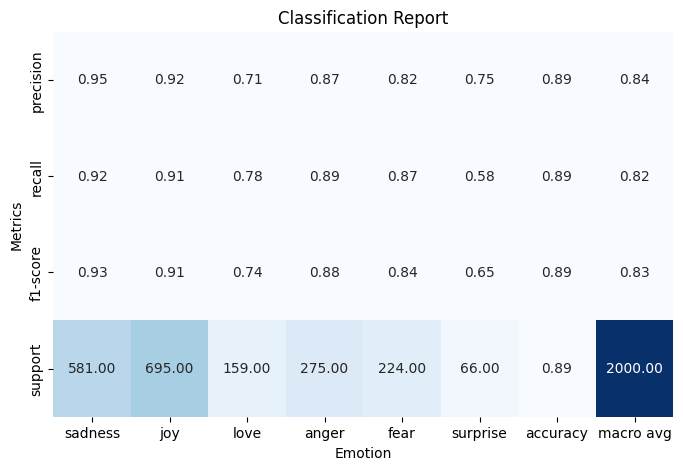

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# Generate classification report
report = classification_report(test_labels, preds, target_names=label_mapping.values(), output_dict=True)

# Convert report to a DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heat map
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f", cbar=False)
plt.title('Classification Report')
plt.xlabel('Emotion')
plt.ylabel('Metrics')
plt.show()


#  Compute the ROC curve and AUC for each emotion class

In [ ]:
import numpy as np
from scipy.special import softmax



# Generate predictions for the test data
predicted_probs = model.predict(test_sequences)

# Convert predicted_probs to probabilities by applying softmax
predicted_probs = softmax(predicted_probs, axis=1)

print(predicted_probs)




63/63 [==============================] - 0s 6ms/step
[[0.3515105  0.1297492  0.12966345 0.12979388 0.12964147 0.12964146]
 [0.351879   0.12970085 0.12960057 0.12961341 0.12960649 0.12959959]
 [0.35178223 0.1297494  0.12961261 0.12962519 0.12961984 0.12961069]
 ...
 [0.13010187 0.350512   0.12995502 0.12983276 0.12985851 0.12973979]
 [0.1307534  0.34759864 0.13123995 0.13026771 0.13009642 0.13004392]
 [0.13709871 0.13623124 0.13622014 0.13727148 0.2687525  0.1844259 ]]


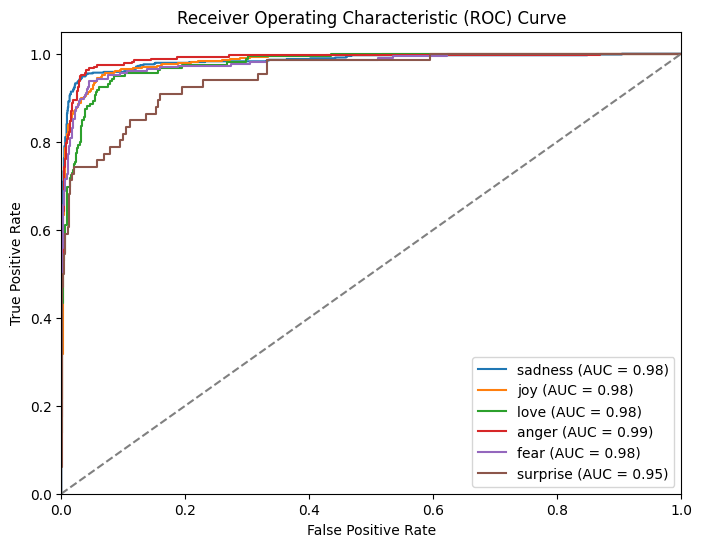

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Convert test_labels and predicted_probs to numpy arrays if they are not already
test_labels = np.array(test_labels)
predicted_probs = np.array(predicted_probs)

# Compute the ROC curve and AUC for each emotion class using the One-vs-Rest approach
fpr = {}
tpr = {}
roc_auc = {}

label_mapping = {'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5}

for label, class_index in label_mapping.items():
    class_probs = predicted_probs[:, class_index]
    fpr[label], tpr[label], _ = roc_curve(test_labels == class_index, class_probs)
    roc_auc[label] = auc(fpr[label], tpr[label])

# Plot the ROC curve for each emotion class
plt.figure(figsize=(8, 6))
for label in label_mapping.keys():
    plt.plot(fpr[label], tpr[label], label=f'{label} (AUC = {roc_auc[label]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

